In [1]:
import pandas as pd
import re

In [2]:
import networkx as nx

In [3]:
G = nx.MultiDiGraph()

In [5]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [4]:
file_path = 'Liguori_BNE_and_Boscan_plus_Biblio_generale_plus_Ibero_Am_Cats.xlsx'
df = pd.read_excel(file_path)

In [5]:
df

Year              Subsequent Years  \
0    1841.0  1845, 1854, 1859, 1874, 1891   
1    1856.0                           NaN   
2    1880.0                           NaN   
3    1842.0                          1900   
4    1851.0                           NaN   
..      ...                           ...   
329  1892.0                           NaN   
330  1850.0                           NaN   
331  1893.0                           NaN   
332  1849.0                           NaN   
333  1858.0                           NaN   

                                             Digitized  Editions  \
0    https://www.google.ie/books/edition/Práctica_d...      10.0   
1                                                  NaN       4.0   
2                                                  NaN       1.0   
3                                                  NaN       5.0   
4                                                  NaN       1.0   
..                                                 ...       ...   
329                                                NaN       NaN   
330                                                NaN       NaN   
331                                                NaN       NaN   
332                                                NaN       NaN   
333  https://www.google.ie/books/edition/Theologia_...       NaN   

                                                 Title  \
0                       Práctica del amor a Jesucristo   
1                  Conformidad con la voluntad de Dios   
2                  Conformidad con la voluntad de Dios   
3                  Conformidad con la voluntad de Dios   
4    Conducta admirable de la Divina Providencia en...   
..                                                 ...   
329                 Libro de misa y lecciones piadosas   
330                           Meditaciones de Adviento   
331                       Manual de ejercicios devotos   
332                               El hombre apostólico   
333                                      Obras morales   

                       Publisher                  Translator      Place  \
0                     Pons y Cía       Joaquín Roca y Cornet  Barcelona   
1                            NaN       Joaquín Roca y Cornet     Bogotá   
2                            NaN                         NaN        NaN   
3         Librería de G. del Amo       Joaquín Roca y Cornet     Madrid   
4                            NaN       Joaquín Roca y Cornet        NaN   
..                           ...                         ...        ...   
329  Librerias de Artes y Letras                         NaN   Santiago   
330         Impr. de la Sociedad                         NaN   Santiago   
331                  El Progreso                         NaN     Madrid   
332                     Lasserre  Raimundo de Miguel y Navas      Paris   
333                   Pons y Cía                         NaN  Barcelona   

                                            Full Title Digitized.1 Notes  \
0    Práctica del amor a Jesucristo : sacada de las...         NaN   NaN   
1                                                  NaN         NaN   NaN   
2    Conformidad con la voluntad de Dios by Alfonso...         NaN   NaN   
3    Conformidad con la voluntad de Dios / obra esc...         NaN   NaN   
4                                                  NaN         NaN   NaN   
..                                                 ...         ...   ...   
329  Libro de misa y lecciones piadosas : contiene:...         NaN   NaN   
330  Meditaciones para los nueve dias del novenario...         NaN   NaN   
331                                                NaN         NaN   NaN   
332  El Hombre apóstolico instruido para el confeso...         NaN   NaN   
333       Obras morales de S. Alfonso Maria de Ligorio         NaN   NaN   

    Country  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
..      ...  
329     NaN  
330     NaN  
331     NaN 

In [5]:

unique_publishers = set()


for publisher_entry in df['Publisher']:
    if pd.notna(publisher_entry):  # Ignore NaN values
        # Split by semicolon, clean spaces, and add each publisher separately
        # publishers = [pub.strip() for pub in str(publisher_entry).split(';') if pub.strip() and if 'Cía' not in pub.strip()]
        # publishers = [pub.strip() for pub in str(publisher_entry).split(';') if pub.strip()
        unique_publishers.add(str(publisher_entry))

# Step 2: Define each unique publisher as a node in the graph
for publisher in unique_publishers:
    G.add_node(publisher, publications=[])


In [6]:
unique_publishers

{' Cons. Ecclesiastica',
 ' Fuentenebro',
 ' Impr. de El Independiente',
 ' Rosal',
 ' Sobradiel',
 ' Tomas F. Nieve',
 ' Villalonga',
 'A. Brusi',
 'Aguado',
 'Aillaud',
 'Apostolado de la Prensa',
 'Arcos',
 'Asilo de huérfanos',
 'Avrial',
 'B. Cano',
 'Baena',
 'Benziger',
 'Bossange',
 'Bouret',
 'Calleja',
 'D.F. Gamayo',
 'Dembourg Gangel',
 'Desclée',
 'El Apostolado de la Prensa',
 'El Progreso',
 'F. Martin S. J',
 'Ferrer de Ortega',
 'Frutos Romero',
 'Garnier',
 'Garrido',
 'Gorosabel',
 'Gómez Fuentenebro',
 'Ignacio Estivill',
 'Imp. Real',
 'Imp. de Abadiano',
 'Imp. de Cualla',
 'Imp. de N. Lora',
 'Impr. Católica',
 'Impr. Cervantes',
 'Impr. de El Correo',
 'Impr. de la Sociedad',
 'Impr. de la Sociedad Literaria',
 'Impr. de la Voz de la Religión',
 'Impr. del Comercio',
 'Imprenta en las Escalerillas',
 'Infante',
 'José García y Martínez',
 'Juan Cueste',
 'Julian Viana Razola',
 'Laborda',
 'Lafargue',
 'Larumbe',
 'Lasserre',
 'Lefevre',
 'Libreria Castellana',


In [7]:
len(unique_publishers)

101

In [7]:
len(unique_publishers)

101

In [8]:


def extract_years(first_ed, subsq_ed):
    years = []

    # Handle first edition year
    if not pd.isna(first_ed):
        try:
            years.append(int(float(first_ed)))  # Convert e.g., 1800.0 -> 1800
        except ValueError:
            pass

    # Handle subsequent years
    if isinstance(subsq_ed, str):
        subsq_list = [int(y.strip()) for y in subsq_ed.split(',') if y.strip().isdigit()]
        years.extend(subsq_list)

    return sorted(set(years))  # Optional: remove duplicates & sort


In [9]:

for specific_publisher in G.nodes():
    # Use zip to iterate over each row in the DataFrame, referencing specific columns
    # for title, first_ed, subsq_ed, edition, publisher, translator, place, country in zip(
    for title, first_ed, subsq_ed, edition, publisher, translator, place in zip(
        df['Title'],
        df['Year'],
        df['Subsequent Years'],
        df['Editions'],
        df['Publisher'],
        df['Translator'],
        df['Place'],
        # df['Country']
    ):
        
        publisher = publisher.strip() if not pd.isna(publisher) else ""
        # publisher_list = [pub.strip() for pub in str(publisher).split(';') if pub.strip()]
        translator_list = [trans.strip() for trans in str(translator).split(';') if trans.strip()]
        place_list = [pl.strip() for pl in str(place).split(';') if pl.strip()]
        # country_list = [pl.strip() for pl in str(country).split(';') if pl.strip()]
        
        if specific_publisher == publisher:
            G.nodes[specific_publisher]['publications'].append({
                'title': title,
                'years': extract_years(first_ed, subsq_ed),
                'editions': int(edition) if not pd.isna(edition) else 1,
                'publisher': publisher,
                'translator': translator_list,
                'place': place_list,
                # 'country': country_list
                })

In [54]:
G.nodes()

NodeView(('Arcos', 'El Progreso', '\xa0Impr. San Buenaventura', 'Impr. de la Voz de la Religión', 'Impr. de la Sociedad Literaria', 'Oficina de Arizpe', 'Dembourg Gangel', 'Mame', 'Aguado', 'Librería de Estevan Trías', 'Avrial', 'Imp. de Abadiano', 'Miró', 'de Bou', 'Bouret', 'Frutos Romero', 'Impr. de la Sociedad', 'Pillet', 'Zicero', 'Impr. Católica', 'Librería católica', 'Riera', 'de Ancos', 'Sánchez', 'Julian Viana Razola', 'Walder', 'Gómez Fuentenebro', 'Apostolado de la Prensa', 'B. Cano', 'Impr. de El Correo', 'Librería de Estévan Trias', 'D.F. Gamayo', 'Laborda', 'Piferrer', 'Infante', 'Calleja', 'Loyódice', 'Impr. del Comercio', ' Impr. de El Independiente', 'Pujal', 'Tiburcio Osacar', 'Pons y Cía', ' Tomas F. Nieve', 'Imp. de N. Lora', 'Asilo de huérfanos', 'Tip. Católica', 'Tasso', 'Librería Religiosa de Enrique Hernández', 'Impr. Cervantes', 'Ferrer de Ortega', 'Ignacio Estivill', 'Sierra y Martí', 'Baena', 'Varela', 'Rosa', 'Imprenta en las Escalerillas', 'Rosa y Bouret', 

In [55]:
G.nodes['Sierra y Martí']['publications']

[{'title': 'Visitas al Santísimo Sacramento',
  'years': [1800, 1814, 1818, 1819, 1843],
  'editions': 53,
  'publisher': 'Sierra y Martí',
  'translator': ['un sacerdote del oratorio de San Felipe Neri de Barcelona'],
  'place': ['Barcelona']},
 {'title': 'Visitas al Santísimo Sacramento',
  'years': [1800],
  'editions': 8,
  'publisher': 'Sierra y Martí',
  'translator': ['nan'],
  'place': ['Barcelona']}]

In [10]:

for publisher in G.nodes():
    if 'publications' in G.nodes[publisher]:  # Check if 'publications' key exists
        # magnitude = sum(pub['editions'][0] for pub in G.nodes[publisher]['publications'])
        magnitude = sum(pub['editions'] for pub in G.nodes[publisher]['publications'])
        G.nodes[publisher]['magnitude'] = magnitude

In [11]:

nodes_with_sizes = [(publisher, data['magnitude']) for publisher, data in G.nodes(data=True) if 'magnitude' in data]

sorted_nodes = sorted(nodes_with_sizes, key=lambda x: x[1], reverse=True)

for publisher, size in sorted_nodes:
    print(f"Publisher: {publisher}, Size: {size}")

Publisher: Pons y Cía, Size: 110
Publisher: Sierra y Martí, Size: 61
Publisher: Garnier, Size: 58
Publisher: Rosa y Bouret, Size: 46
Publisher: Riera, Size: 31
Publisher: Librería Religiosa, Size: 23
Publisher: Roca y Brors, Size: 23
Publisher: Benziger, Size: 21
Publisher: Calleja, Size: 19
Publisher: Bouret, Size: 15
Publisher: Racon y Cía, Size: 10
Publisher: Libreria Castellana, Size: 10
Publisher: Piferrer, Size: 9
Publisher: Aguado, Size: 8
Publisher: Rosa, Size: 6
Publisher: Varela, Size: 6
Publisher: Loyódice, Size: 6
Publisher: Palacios, Size: 6
Publisher: Librería de G. del Amo, Size: 5
Publisher: López, Size: 4
Publisher: Juan Cueste, Size: 4
Publisher: Infante, Size: 4
Publisher: Repullés, Size: 3
Publisher: Larumbe, Size: 3
Publisher: de Ancos, Size: 3
Publisher: Mame, Size: 3
Publisher: Walder, Size: 3
Publisher: Impr. Católica, Size: 3
Publisher: Apostolado de la Prensa, Size: 3
Publisher: Tip. Católica, Size: 2
Publisher: Gómez Fuentenebro, Size: 2
Publisher: Villanueva

In [58]:
len(G.nodes())

101

In [12]:
for publisher in G.nodes():
    if G.nodes[publisher]['magnitude'] == 0:
        print(publisher)
        G.nodes[publisher]['magnitude'] = 1

 Sobradiel
 Fuentenebro
 Rosal
 Villalonga
 Tomas F. Nieve
 Impr. San Buenaventura
 Cons. Ecclesiastica
 Impr. de El Independiente


In [63]:
G.nodes['Salva']['magnitude']

1

In [65]:
G.nodes[' Villalonga']['magnitude']

1

In [12]:

def add_edge_with_attributes(G, publisher_A, publisher_B, title, source_years, target_years,
                             source_translator, target_translator, source_num_editions,
                             target_num_editions, source_place, target_place, weight, relation, key):
    G.add_edge(publisher_A, publisher_B, title=title, source_years=source_years, target_years=target_years,
               source_translator=source_translator, target_translator=target_translator,
               source_num_editions=source_num_editions, target_num_editions=target_num_editions,
               source_place=source_place, target_place=target_place, weight=weight, relation=relation, key=key)

In [13]:
import itertools

In [14]:
existing_edges = set()

In [15]:
# import itertools

# Function to add edges between publishers with support for multiple edges of the same type
def add_edges_between_publishers(G):
    for pub_A, pub_B in itertools.combinations(G.nodes, 2):  # Iterate over pairs of nodes
        publications_A = G.nodes[pub_A]['publications']
        publications_B = G.nodes[pub_B]['publications']
        
        # Compare all publications between two publishers
        for publication_A in publications_A:
            for publication_B in publications_B:
                title_A, title_B = publication_A['title'], publication_B['title']
                years_A, years_B = publication_A['years'], publication_B['years']
                editions_A, editions_B = publication_A['editions'], publication_B['editions']
                translators_A, translators_B = publication_A['translator'], publication_B['translator']
                publishers_A, publishers_B = set(publication_A['publisher']), set(publication_B['publisher'])
                
                # Initialize edge counters
                edge_counter = 0

                # Check for copublication
                if (len(publishers_A) == 1 & len(publishers_B) == 1) and title_A == title_B and set(years_A) == set(years_B):
                    # Create a unique edge key
                    edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
                    edge_key = f"copub_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                    # Check if the edge already exists
                    if edge_key not in existing_edges:
                        weight = max(editions_A, editions_B)
                        add_edge_with_attributes(
                            G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                            editions_A, editions_B, publication_A['place'], publication_B['place'],
                            weight, 'copublication', edge_key
                        )
                        existing_edges.add(edge_key)

                # Check for reprint relation
                if set(translators_A) == set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"reprint_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'reprint', edge_key
                                )
                                existing_edges.add(edge_key)

                # Check for retranslation relation
                if set(translators_A) != set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"retrans_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'retranslation', edge_key
                                )
                                existing_edges.add(edge_key)

In [16]:

# Add edges based on all publication relationships
add_edges_between_publishers(G)

In [18]:
# len(G.edges())

506

In [17]:
len(G.edges())

592

In [18]:

nx.write_gpickle(G, "Spanish_Liguori.gpickle")

In [19]:

import pickle

with open('Spanish_Liguori.pkl', 'wb') as f:
    pickle.dump(G, f)


In [19]:


for title, first_ed, subsq_ed, edition, publisher, translator, place in zip(
        df['Title'],
        df['Year'],
        df['Subsequent Years'],
        df['Editions'],
        df['Publisher'],
        df['Translator'],
        df['Place']
    ):
    
    publisher_list = [pub.strip() for pub in str(publisher).split(';') if pub.strip()]
    
    translator_list = [trans.strip() for trans in str(translator).split(';') if trans.strip()]
    
    place_list = [pl.strip() for pl in str(place).split(';') if pl.strip()]
    
    if len(publisher_list) > 1:
        
        for pub_A, pub_B in itertools.combinations(publisher_list, 2):
            # Assign a weight based on editions
            weight = max(edition, edition)
            # Generate a unique edge key for each copublication instance
            edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
            edge_key = f"copub_{pub_A}_{pub_B}_{title}_{edge_counter}"

            # Check if the edge already exists
            if edge_key not in existing_edges:
                add_edge_with_attributes(
                    G, pub_A, pub_B, title, [first_ed, subsq_ed], [first_ed, subsq_ed], translator_list, translator_list,
                    [edition], [edition], place_list, place_list, weight, 'copublication', edge_key
                )
                existing_edges.add(edge_key)


In [17]:
# NUMBER OF EDGES in the FRENCH GRAPH
# len(G.edges())

5685

In [18]:
# FRENCH GRAPH Validating the output above 
# len(existing_edges)

5685

In [20]:
# NUMBER OF EDGES in the SPANISH GRAPH
len(G.edges())

506

In [21]:
len(existing_edges)

506

In [22]:

edges_with_weights = [
    (u, v, attr['weight']) 
    for u, v, attr in G.edges(data=True) 
    if 'weight' in attr
]

sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)

In [23]:
sorted_edges[0]

('Ignacio Estivill', 'Pons y Cía', 17)

In [24]:
sorted_edges[:10]

[('Ignacio Estivill', 'Pons y Cía', 17),
 ('Librería Religiosa', 'Garnier', 10),
 ('Frutos Romero', 'Piferrer', 9),
 ('Oficina de Arizpe', 'Piferrer', 9),
 ('A. Brusi', 'Garnier', 7),
 ('Libreria Castellana', 'Riera', 7),
 ('Libreria Castellana', 'Pons y Cía', 7),
 ('Frutos Romero', 'Garnier', 7),
 ('Oficina de Arizpe', 'Garnier', 7),
 ('Trias', 'Roca y Brors', 7)]

In [25]:
out_degrees = dict(G.out_degree())
in_degrees = dict(G.in_degree())
overall_degrees = {node: out_degrees.get(node, 0) + in_degrees.get(node, 0) for node in G.nodes()}

nodes_by_out_degree = sorted(out_degrees, key=out_degrees.get, reverse=True)
nodes_by_in_degree = sorted(in_degrees, key=in_degrees.get, reverse=True)
nodes_by_overall_degree = sorted(overall_degrees, key=overall_degrees.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree:
    print(node, out_degrees[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree:
    print(node, in_degrees[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree:
    print(node, overall_degrees[node])

Nodes ordered by outgoing degree:
Frutos Romero 36
Garnier 35
Oficina de Arizpe 34
Bossange 29
A. Brusi 25
Bouret 25
Librería Religiosa 19
Salva 17
Libreria Castellana 14
Aillaud 14
Lafargue 14
Zicero 14
Piferrer 12
José García y Martínez 12
Rosa y Bouret 12
Magrina 11
Larumbe 11
Moreno 11
Dembourg Gangel 11
Rosa 11
Julian Viana Razola 10
Pillet 10
Impr. de El Correo 8
Pujal 8
Lefevre 8
Imp. Real 7
Ignacio Estivill 6
Walder 6
Asilo de huérfanos 5
Roca y Brors 5
Villanueva 4
de Ancos 4
de Plá 4
Ferrer de Ortega 4
Racon y Cía 3
Miró 3
Soto Freire 3
Santíago y Soto 3
Gorosabel 3
Librería de León Pablo Villaverde 3
Riera 3
Sierra y Martí 3
Mame 2
Imprenta en las Escalerillas 2
Calleja 2
Juan Cueste 2
Aguado 2
Arcos 1
Tip. Católica 1
Repullés 1
Impr. de la Sociedad 1
Trias 1
Baena 1
Avrial 1
Sánchez 1
Lasserre 1
Benziger 1
B. Cano 1
Varela 1
López 1
Desclée 1
Loyódice 1
Infante 1
Impr. Cervantes 0
Librería de G. del Amo 0
 Sobradiel 0
Impr. de la Sociedad Literaria 0
Garrido 0
Gómez Fuenten

In [26]:

weights = []

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G.nodes():
    successors = []
    for node_id in G.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            #weights.append(sum(weight))
            weights.append(weight)
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G.nodes():
    predecessors = []
    for node_id in G.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            # weights.append(sum(weight))
            weights.append(weight)
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)

Outgoing Weighted Degrees: {'Frutos Romero': 74, 'Oficina de Arizpe': 72, 'Garnier': 68, 'Bossange': 53, 'A. Brusi': 48, 'Libreria Castellana': 43, 'Librería Religiosa': 39, 'Salva': 37, 'Bouret': 36, 'Lafargue': 33, 'Zicero': 32, 'Piferrer': 31, 'José García y Martínez': 31, 'Aillaud': 25, 'Moreno': 25, 'Rosa': 25, 'Rosa y Bouret': 25, 'Ignacio Estivill': 23, 'Dembourg Gangel': 23, 'Pillet': 23, 'Julian Viana Razola': 22, 'Imp. Real': 18, 'Pujal': 16, 'Lefevre': 16, 'Ferrer de Ortega': 16, 'Magrina': 15, 'Larumbe': 15, 'Walder': 12, 'Sierra y Martí': 12, 'Impr. de El Correo': 11, 'Villanueva': 11, 'Aguado': 8, 'Trias': 7, 'Asilo de huérfanos': 6, 'de Plá': 6, 'Riera': 6, 'Lasserre': 5, 'Roca y Brors': 5, 'Librería de León Pablo Villaverde': 5, 'Racon y Cía': 4, 'de Ancos': 4, 'Miró': 3, 'Soto Freire': 3, 'Santíago y Soto': 3, 'Gorosabel': 3, 'Juan Cueste': 3, 'Mame': 2, 'Imprenta en las Escalerillas': 2, 'Benziger': 2, 'Calleja': 2, 'Arcos': 1, 'Tip. Católica': 1, 'Repullés': 1, 'Impr

In [27]:
from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places = source_place_counter.most_common()
sorted_target_places = target_place_counter.most_common()
sorted_overall_places = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places)
print("Sorted Target Places:", sorted_target_places)
print("Sorted Overall Places:", sorted_overall_places)

Sorted Source Places: [('Paris', 186), ('Barcelona', 98), ('Madrid', 46), ('Guadalajara', 36), ('México', 36), ('Bordeaux', 14), ('Cali', 14), ('Bilbao', 11), ('Carmona', 11), ('Metz', 11), ('Santiago', 10), ('Lugo', 6), ('Guadalupe', 5), ('Burgos', 4), ('Valencia', 4), ('Toulouse', 3), ('Tours', 2), ('nan', 2), ('Valladolid', 2), ('Palma', 1), ('Binondo', 1), ('Einsiedeln', 1), ('Tournai', 1), ('Reus', 1)]
Sorted Target Places: [('Madrid', 168), ('Barcelona', 114), ('Paris', 80), ('Santiago', 39), ('Tournai', 27), ('Valladolid', 20), ('Tours', 11), ('Guadalupe', 6), ('Carmona', 6), ('Lugo', 6), ('Bilbao', 5), ('Einsiedeln', 5), ('Metz', 4), ('Toulouse', 3), ('Bordeaux', 3), ('Cali', 3), ('Valparaíso', 2), ('Gudalajara', 2), ('nan', 1), ('México', 1)]
Sorted Overall Places: [('Paris', 266), ('Madrid', 214), ('Barcelona', 212), ('Santiago', 49), ('México', 37), ('Guadalajara', 36), ('Tournai', 28), ('Valladolid', 22), ('Carmona', 17), ('Bordeaux', 17), ('Cali', 17), ('Bilbao', 16), ('Me

In [28]:

source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in G.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            # source_place_counter_weighted[place] += weight[0]
            source_place_counter_weighted[place] += weight
            
    for place_list in target_places:
        for place in place_list:
            # target_place_counter_weighted[place] += weight[0]
            target_place_counter_weighted[place] += weight

    for place_list in source_places + target_places:
        for place in place_list:
            # overall_place_counter_weighted[place] += weight[0]
            overall_place_counter_weighted[place] += weight

sorted_source_places_weighted = source_place_counter_weighted.most_common()
sorted_target_places_weighted = target_place_counter_weighted.most_common()
sorted_overall_places_weighted = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted)

Sorted Source Places (Weighted): [('Paris', 373), ('Barcelona', 200), ('Madrid', 96), ('Guadalajara', 74), ('México', 74), ('Bordeaux', 33), ('Cali', 32), ('Carmona', 25), ('Metz', 23), ('Valencia', 16), ('Bilbao', 15), ('Santiago', 13), ('Burgos', 11), ('Palma', 7), ('Guadalupe', 6), ('Lugo', 6), ('Reus', 4), ('Toulouse', 3), ('Valladolid', 3), ('Tours', 2), ('Einsiedeln', 2), ('nan', 2), ('Binondo', 1), ('Tournai', 1)]
Sorted Target Places (Weighted): [('Barcelona', 306), ('Paris', 240), ('Madrid', 215), ('Valladolid', 80), ('Tournai', 54), ('Santiago', 39), ('Tours', 22), ('Bilbao', 15), ('Carmona', 12), ('Guadalupe', 6), ('Lugo', 6), ('Toulouse', 6), ('Einsiedeln', 5), ('Metz', 4), ('Bordeaux', 3), ('Cali', 3), ('Valparaíso', 2), ('Gudalajara', 2), ('nan', 1), ('México', 1)]
Sorted Overall Places (Weighted): [('Paris', 613), ('Barcelona', 506), ('Madrid', 311), ('Valladolid', 83), ('México', 75), ('Guadalajara', 74), ('Tournai', 55), ('Santiago', 52), ('Carmona', 37), ('Bordeaux', 

In [29]:
# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)

# Sort titles based on unweighted occurrences
sorted_unweighted_titles = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles:
    print(f"Title and number of connections between places it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles:
    print(f"Title and weighted number of connections between places it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")

Title and number of connections between places it occasioned: ('Visitas al Santísimo Sacramento', 367) | Source Places: {'Cali', 'Madrid', 'Tours', 'Guadalupe', 'Valladolid', 'Bordeaux', 'Guadalajara', 'México', 'Carmona', 'Metz', 'Tournai', 'Santiago', 'Barcelona', 'Paris', 'Bilbao'} | Target Places: {'Cali', 'Madrid', 'Tours', 'Guadalupe', 'Valladolid', 'Bordeaux', 'México', 'Carmona', 'Tournai', 'Metz', 'Santiago', 'Barcelona', 'Paris', 'Bilbao'}
Title and number of connections between places it occasioned: ('Las Glorias de María', 40) | Source Places: {'Barcelona', 'Paris', 'Toulouse', 'Valencia'} | Target Places: {'Barcelona', 'Paris', 'Madrid', 'Toulouse'}
Title and number of connections between places it occasioned: ('Práctica del amor a Jesucristo', 20) | Source Places: {'Barcelona', 'Paris', 'Einsiedeln'} | Target Places: {'Madrid', 'Lugo', 'Einsiedeln', 'Barcelona', 'Paris'}
Title and number of connections between places it occasioned: ('Preparación para la muerte', 16) | Sou

In [30]:

G_combined = nx.DiGraph()

for u, v, key, data in G.edges(keys=True, data=True):
    if G_combined.has_edge(u, v):
        # G_combined[u][v]['weight'] += sum(data['weight'])
        G_combined[u][v]['weight'] += data['weight']
    else:
        # G_combined.add_edge(u, v, weight=sum(data['weight']))
        G_combined.add_edge(u, v, weight=data['weight'])

for node, data in G.nodes(data=True):
    if not G_combined.has_node(node):
        G_combined.add_node(node, magnitude=G.nodes[node].get('magnitude', 1))

In [31]:

len(G_combined.nodes())

101

In [32]:
len(G_combined.edges())

471

In [33]:
closeness_centralities = nx.closeness_centrality(G_combined)

betweenness_centralities = nx.betweenness_centrality(G_combined)

In [34]:

eigenvector_centralities = nx.eigenvector_centrality(G_combined)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [41]:
eigenvector_centralities = nx.eigenvector_centrality(G_combined, max_iter = 500)

In [42]:
import operator

In [43]:

sorted_closeness = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_centralities.items(), key=operator.itemgetter(1), reverse=True)

In [44]:

sorted_closeness

[('Calleja', 0.33379310344827584),
 ('Pons y Cía', 0.32142857142857145),
 ('Infante', 0.3211111111111111),
 ('Librería Religiosa de Enrique Hernández', 0.2865789473684211),
 ('Riera', 0.2865789473684211),
 ('Desclée', 0.2745714285714286),
 ('Apostolado de la Prensa', 0.2678481012658228),
 ('Aguado', 0.24446428571428572),
 ('Librería de León Pablo Villaverde', 0.22090909090909094),
 ('El Progreso', 0.21600000000000003),
 ('Juan Cueste', 0.20631578947368423),
 ('Walder', 0.1877777777777778),
 ('Avrial', 0.15),
 ('Garnier', 0.14450000000000002),
 ('Roca y Brors', 0.14297297297297298),
 ('Lefevre', 0.125),
 ('Varela', 0.12),
 ('Impr. Católica', 0.11918918918918918),
 ('Pujal', 0.11645161290322581),
 ('Benziger', 0.11428571428571428),
 ('Rosa y Bouret', 0.1128125),
 ('Mame', 0.11),
 ('de Bou', 0.10256410256410256),
 ('Baena', 0.1),
 ('Librería Religiosa', 0.1),
 ('Gorosabel', 0.09818181818181818),
 ('de Plá', 0.09),
 ('Impr. del Comercio', 0.08756756756756758),
 ('N. Parga', 0.0654545454545

In [45]:

sorted_betweenness

[('Garnier', 0.01552188552188552),
 ('Librería Religiosa', 0.007037037037037036),
 ('Infante', 0.005151515151515152),
 ('Calleja', 0.004604377104377104),
 ('Roca y Brors', 0.0027525252525252525),
 ('Riera', 0.002457912457912458),
 ('Varela', 0.0015151515151515152),
 ('Rosa y Bouret', 0.0012205387205387204),
 ('Bouret', 0.0006144781144781145),
 ('Benziger', 0.00030303030303030303),
 ('Aguado', 0.00020202020202020202),
 ('Avrial', 0.00013468013468013467),
 ('A. Brusi', 0.0),
 ('Impr. de El Correo', 0.0),
 ('Asilo de huérfanos', 0.0),
 ('Magrina', 0.0),
 ('Aillaud', 0.0),
 ('Larumbe', 0.0),
 ('Baena', 0.0),
 ('Salva', 0.0),
 ('Mame', 0.0),
 ('de Plá', 0.0),
 ('Moreno', 0.0),
 ('Pujal', 0.0),
 ('Lefevre', 0.0),
 ('Librería Religiosa de Enrique Hernández', 0.0),
 ('Walder', 0.0),
 ('Librería de León Pablo Villaverde', 0.0),
 ('Desclée', 0.0),
 ('Juan Cueste', 0.0),
 ('Pons y Cía', 0.0),
 ('Arcos', 0.0),
 ('Tip. Católica', 0.0),
 ('Librería católica', 0.0),
 ('Racon y Cía', 0.0),
 ('Miró', 0

In [46]:

sorted_eigenvector

[('El Progreso', 0.9602065960641089),
 ('Pons y Cía', 0.2779438311994143),
 ('Infante', 0.024424194690802918),
 ('Apostolado de la Prensa', 0.010307462349905278),
 ('Aguado', 0.006901099104393609),
 ('Calleja', 0.0002401250324665621),
 ('Riera', 0.0001607217278724873),
 ('Desclée', 0.00016069037442892326),
 ('Librería de León Pablo Villaverde', 3.3316574683021575e-06),
 ('Juan Cueste', 3.331657374749817e-06),
 ('Varela', 1.6792786053495349e-06),
 ('Librería Religiosa de Enrique Hernández', 6.335619525523e-08),
 ('Walder', 6.229565055975805e-08),
 ('Impr. Católica', 3.189817058990999e-08),
 ('Roca y Brors', 3.189816960728777e-08),
 ('Rosa y Bouret', 5.297631906115277e-10),
 ('Benziger', 5.297631905074312e-10),
 ('Gorosabel', 5.297631822835513e-10),
 ('Lefevre', 5.226067530110637e-10),
 ('Pujal', 5.225141751699799e-10),
 ('de Bou', 5.222344761924505e-10),
 ('Impr. del Comercio', 5.222344761400708e-10),
 ('Avrial', 1.524843149058973e-11),
 ('Garnier', 7.715827385569515e-12),
 ('N. Parga',

In [47]:

weighted_closeness = nx.closeness_centrality(G_combined, distance='weight')
weighted_betweenness = nx.betweenness_centrality(G_combined, weight='weight')
weighted_eigenvector = nx.eigenvector_centrality(G_combined, max_iter = 500, weight='weight')

sorted_weighted_closeness = sorted(weighted_closeness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector = sorted(weighted_eigenvector.items(), key=lambda x: x[1], reverse=True)

In [48]:

sorted_weighted_closeness

[('Librería Religiosa de Enrique Hernández', 0.27225),
 ('Infante', 0.20975806451612905),
 ('Apostolado de la Prensa', 0.18725663716814162),
 ('Aguado', 0.16901234567901233),
 ('El Progreso', 0.16382022471910115),
 ('Calleja', 0.15488),
 ('Librería de León Pablo Villaverde', 0.1401923076923077),
 ('Desclée', 0.13535211267605632),
 ('Avrial', 0.1323529411764706),
 ('Riera', 0.11226804123711341),
 ('Pons y Cía', 0.10125),
 ('Baena', 0.1),
 ('de Plá', 0.09),
 ('Roca y Brors', 0.08396825396825397),
 ('Librería Religiosa', 0.07142857142857144),
 ('Benziger', 0.06896551724137932),
 ('Impr. Católica', 0.06890625),
 ('Asilo de huérfanos', 0.06),
 ('N. Parga', 0.055384615384615386),
 ('Mame', 0.055),
 ('Walder', 0.054079999999999996),
 ('Varela', 0.05284403669724771),
 ('Lefevre', 0.05128205128205128),
 ('Juan Cueste', 0.04930817610062893),
 ('Pujal', 0.04688311688311688),
 ('Gorosabel', 0.045),
 ('Magrina', 0.04),
 ('Aillaud', 0.04),
 ('Salva', 0.04),
 ('Dembourg Gangel', 0.04),
 ('Julian Vian

In [49]:

sorted_weighted_betweenness

[('Garnier', 0.01292929292929293),
 ('Librería Religiosa', 0.011262626262626262),
 ('Infante', 0.005151515151515152),
 ('Roca y Brors', 0.005101010101010101),
 ('Calleja', 0.004747474747474748),
 ('Riera', 0.00202020202020202),
 ('Varela', 0.00202020202020202),
 ('Bouret', 0.0008080808080808081),
 ('Rosa y Bouret', 0.0008080808080808081),
 ('Benziger', 0.00040404040404040404),
 ('Avrial', 0.00020202020202020202),
 ('Pujal', 0.00020202020202020202),
 ('Lefevre', 0.00020202020202020202),
 ('Aguado', 0.00015151515151515152),
 ('Lasserre', 0.00015151515151515152),
 ('Asilo de huérfanos', 3.367003367003367e-05),
 ('Miró', 3.367003367003367e-05),
 ('A. Brusi', 0.0),
 ('Impr. de El Correo', 0.0),
 ('Magrina', 0.0),
 ('Aillaud', 0.0),
 ('Larumbe', 0.0),
 ('Baena', 0.0),
 ('Salva', 0.0),
 ('Mame', 0.0),
 ('de Plá', 0.0),
 ('Moreno', 0.0),
 ('Librería Religiosa de Enrique Hernández', 0.0),
 ('Walder', 0.0),
 ('Librería de León Pablo Villaverde', 0.0),
 ('Desclée', 0.0),
 ('Juan Cueste', 0.0),
 (

In [50]:

sorted_weighted_eigenvector

[('Pons y Cía', 0.9797306792040129),
 ('El Progreso', 0.1998993149738085),
 ('Infante', 0.010913219896686475),
 ('Aguado', 0.006525499381947671),
 ('Apostolado de la Prensa', 0.0025001378902489704),
 ('Riera', 0.0003259894445055469),
 ('Calleja', 0.00012456052980850418),
 ('Desclée', 8.39956224100509e-05),
 ('Juan Cueste', 7.279172018254325e-06),
 ('Librería de León Pablo Villaverde', 1.8197930395397533e-06),
 ('Varela', 1.8023562313245704e-06),
 ('Impr. Católica', 1.3206583715401513e-07),
 ('Walder', 7.297356161120633e-08),
 ('Librería Religiosa de Enrique Hernández', 2.450084361979323e-08),
 ('Roca y Brors', 2.4403385492682177e-08),
 ('Rosa y Bouret', 4.744262958502251e-09),
 ('Gorosabel', 8.637928030174319e-10),
 ('Benziger', 4.318964104719823e-10),
 ('Lefevre', 4.306466029858818e-10),
 ('Pujal', 4.306350306904649e-10),
 ('de Bou', 4.305769008439116e-10),
 ('Impr. del Comercio', 4.3057690078322224e-10),
 ('Garnier', 1.352091102647351e-11),
 ('Avrial', 5.338377433361694e-12),
 ('N. P

In [51]:
import matplotlib.pyplot as plt

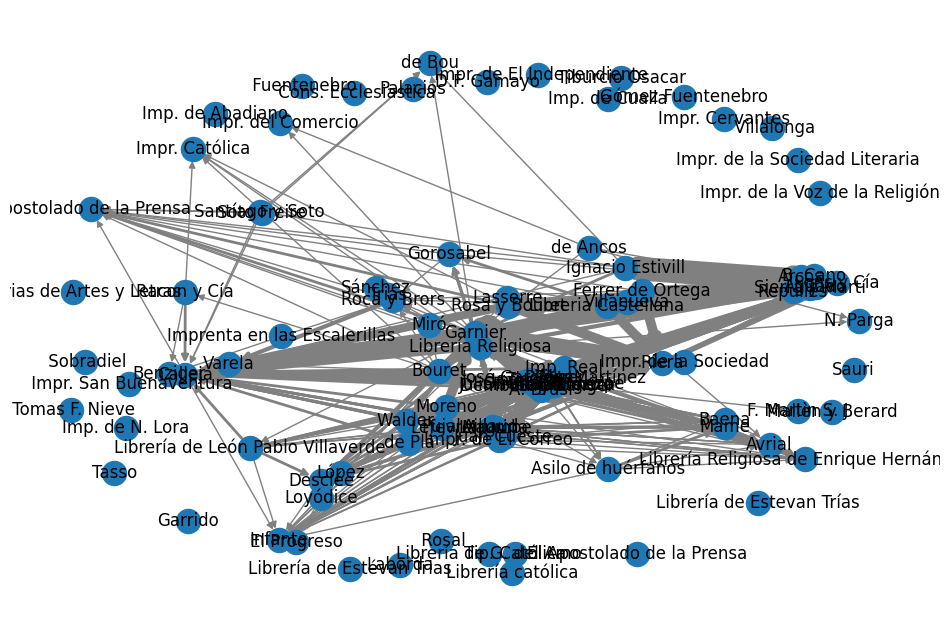

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G_combined)

edge_widths = [data['weight'] for _, _, data in G_combined.edges(data=True)]

nx.draw(
    G_combined, pos, with_labels=True, width=edge_widths,
    edge_color='gray', arrows=True, ax=ax
)

plt.savefig('Pietra_Margento_19th_Cent_Liguori_SP_graph_updated.png')

plt.show()

In [30]:
plt.clf()
plt.close()

In [53]:
plt.close()

In [55]:
import numpy as np

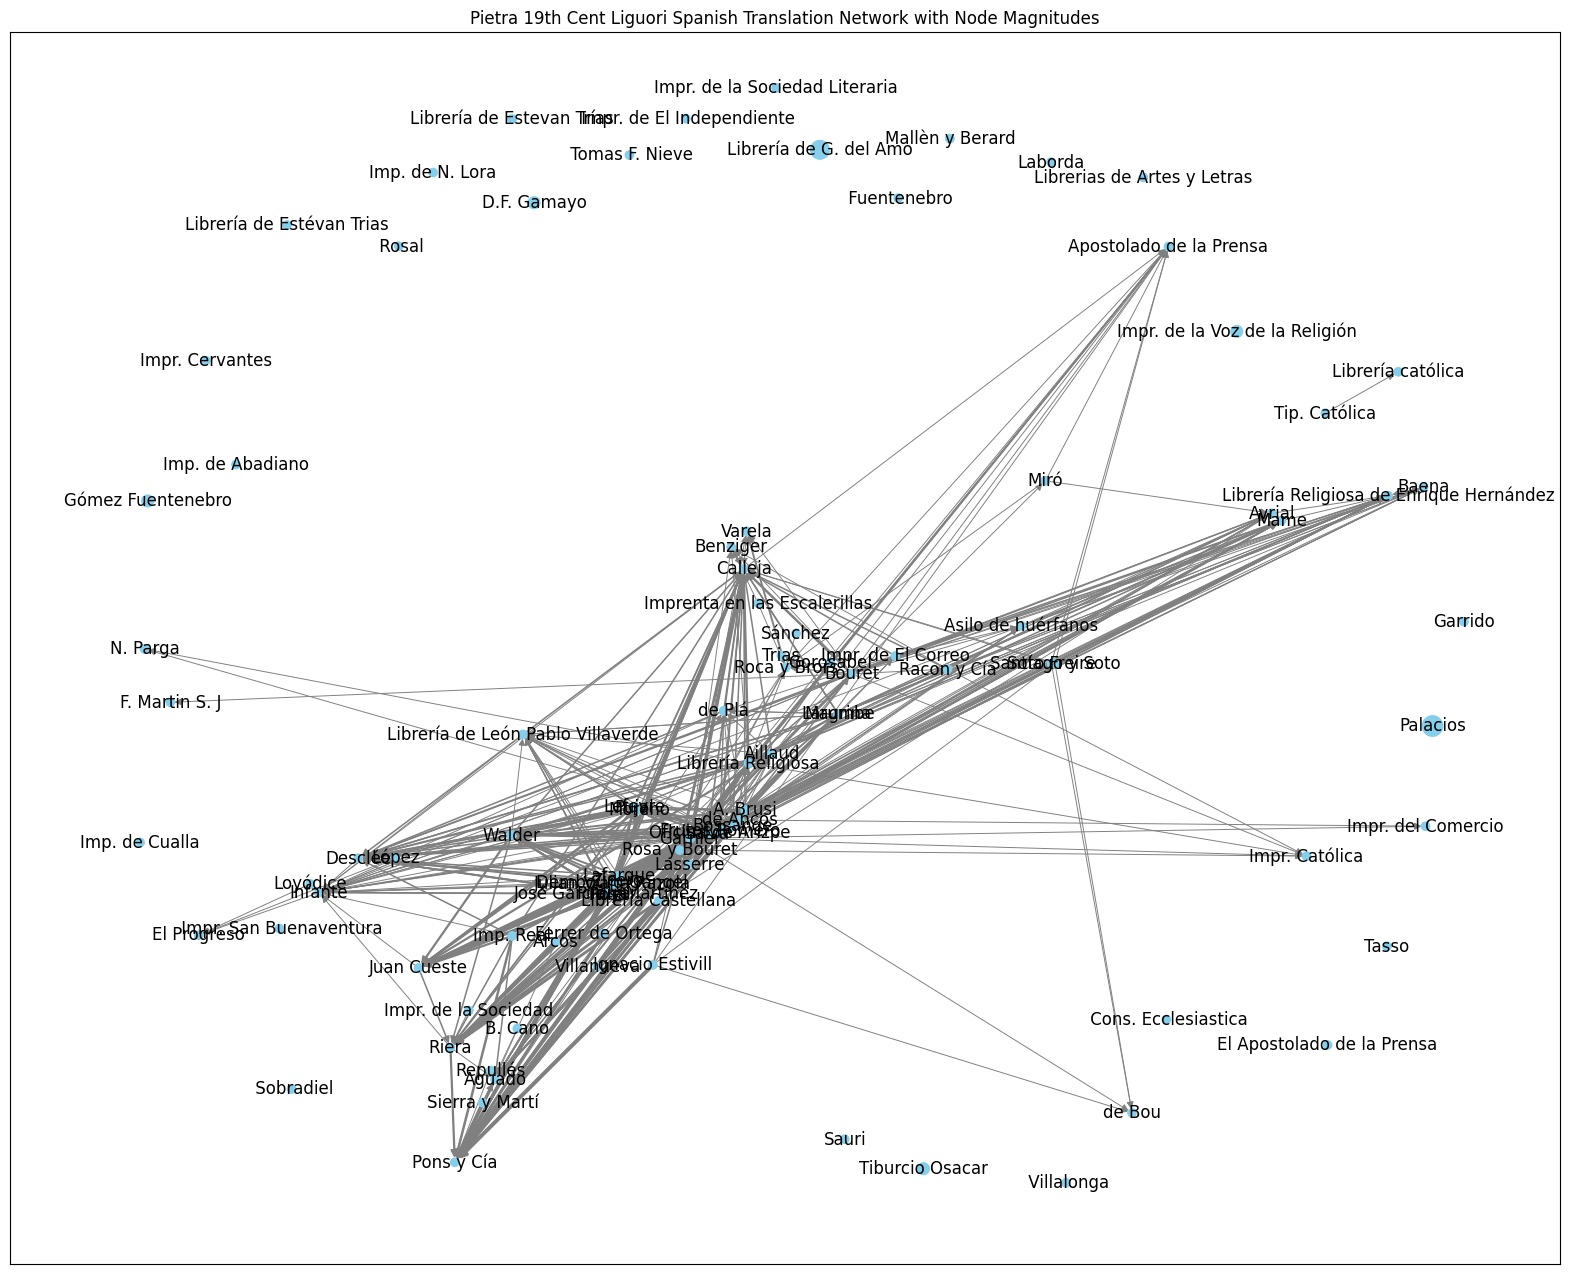

In [57]:
fig, ax = plt.subplots(figsize=(20, 16))

node_sizes = [G_combined.nodes[node].get('magnitude', 1) for node in G_combined.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

pos = nx.spring_layout(G_combined)

edge_widths = [np.log(data['weight'] + 1) for _, _, data in G_combined.edges(data=True)]


nx.draw_networkx(G_combined, pos, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori Spanish Translation Network with Node Magnitudes")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_SP_w_Node_Magnitudes.png')

plt.show()

In [58]:

main_component = max(nx.weakly_connected_components(G_combined), key=len)
G_main = G_combined.subgraph(main_component)

In [59]:

node_sizes1 = [G_main.nodes[node].get('magnitude', 1) for node in G_main.nodes()]

node_sizes1 = [size * 36 for size in node_sizes1]

In [60]:
plt.close()

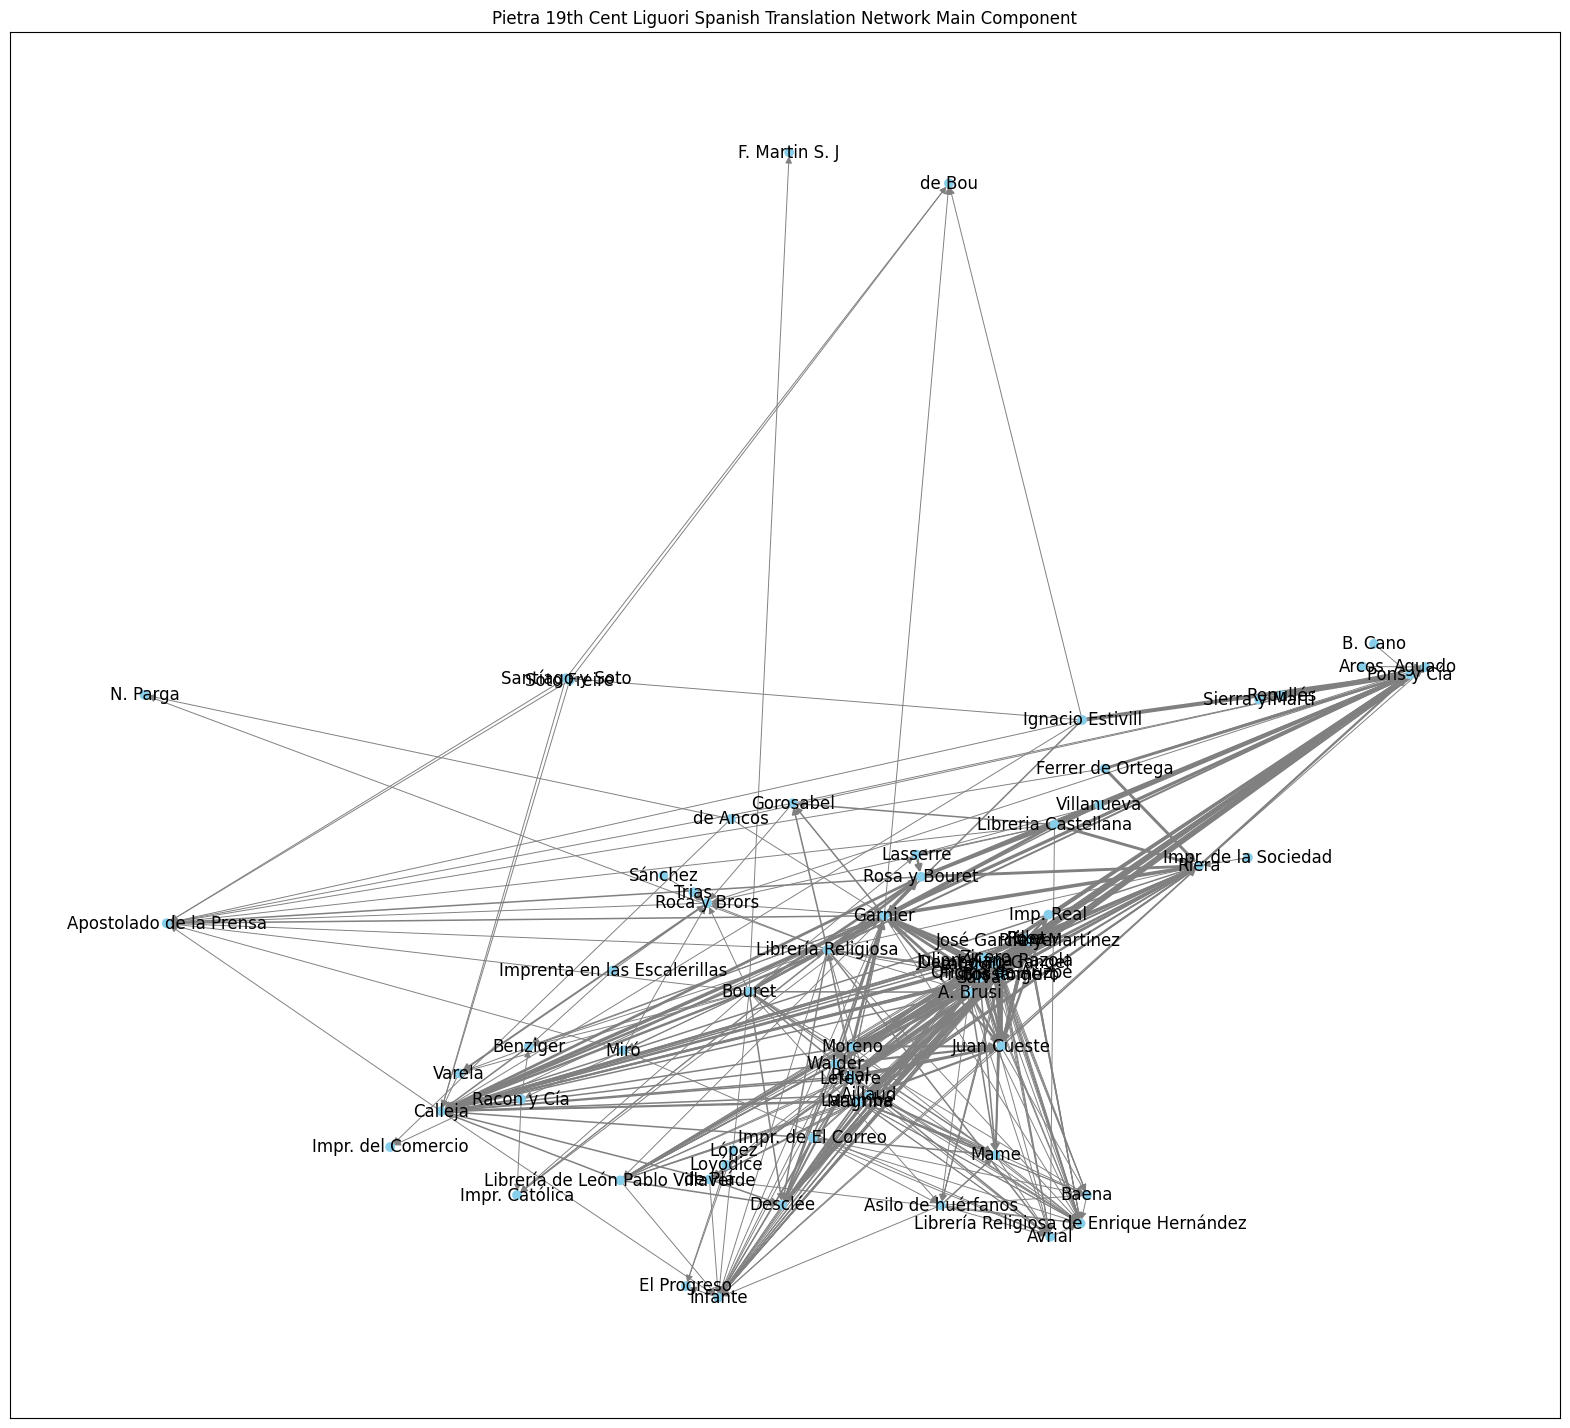

In [62]:
fig, ax = plt.subplots(figsize=(20, 18))

pos = nx.spring_layout(G_main)

edge_widths1 = [np.log(data['weight'] + 1) for _, _, data in G_main.edges(data=True)]

nx.draw_networkx(G_main, pos, node_size=node_sizes1, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths1, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori Spanish Translation Network Main Component")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_SP_Main_Component.png')

plt.show()

In [63]:
plt.close()

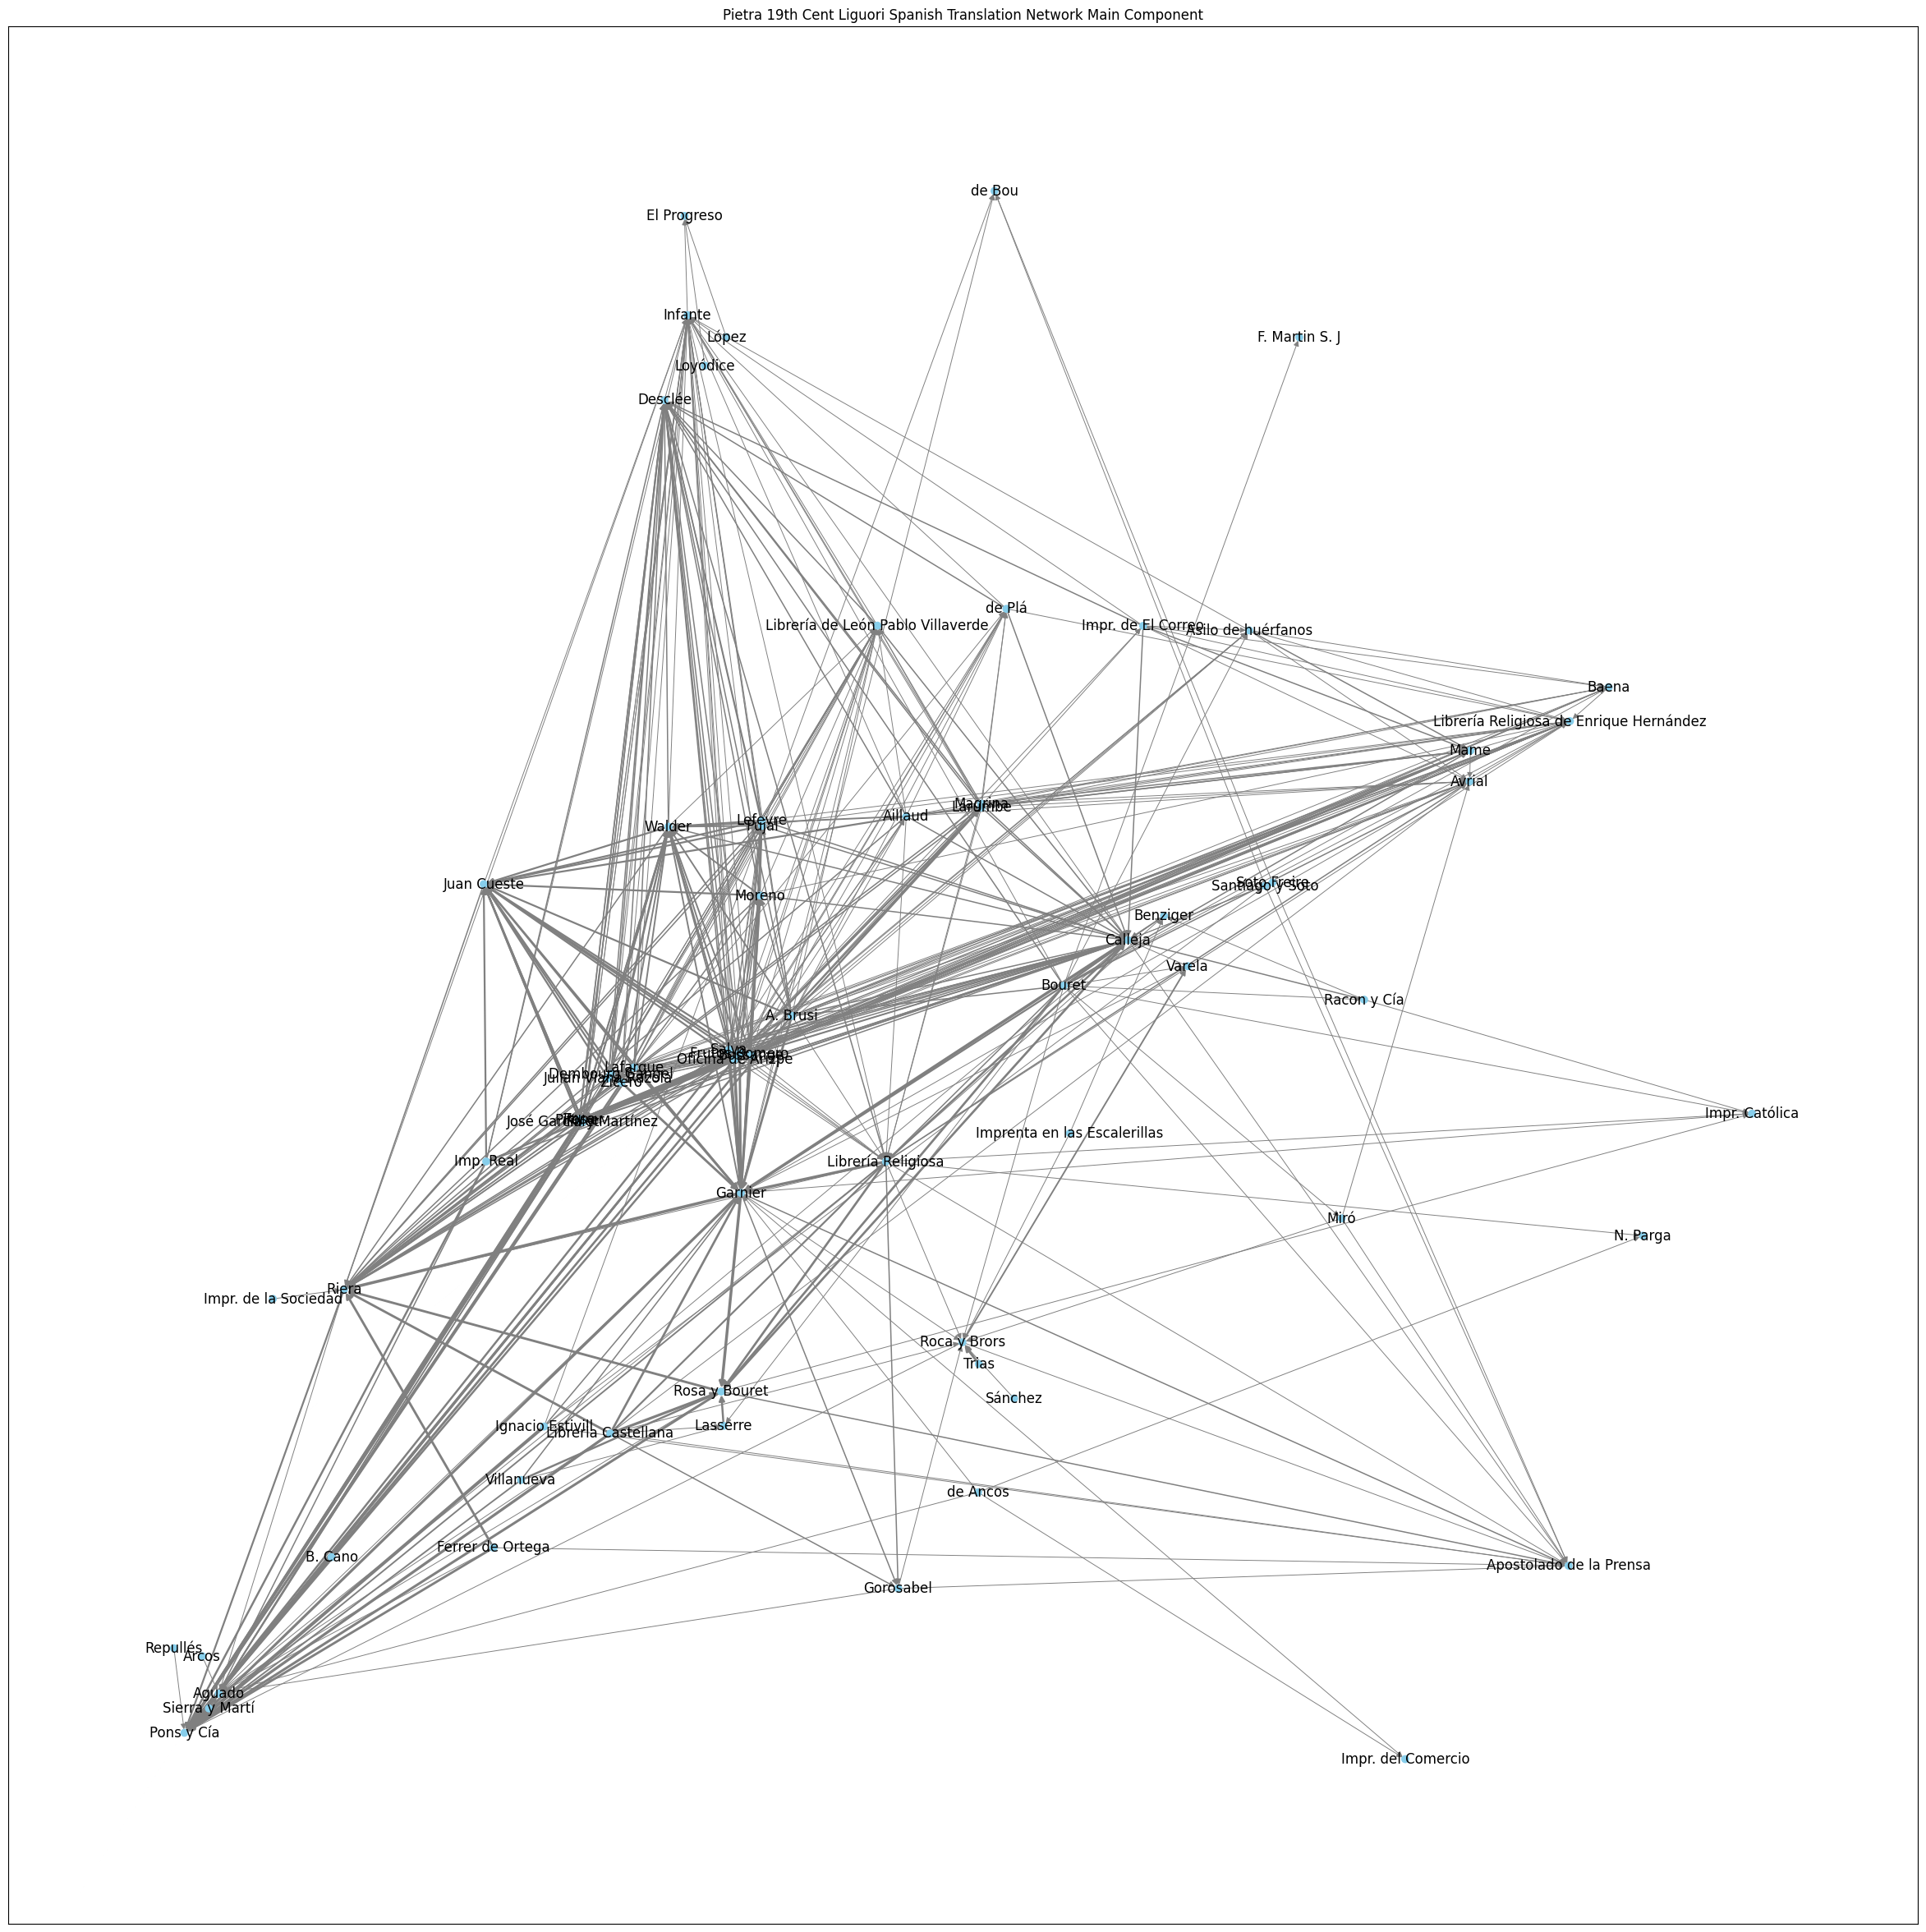

In [64]:

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G_main)

edge_widths1 = [np.log(data['weight'] + 1) for _, _, data in G_main.edges(data=True)]

nx.draw_networkx(G_main, pos, node_size=node_sizes1, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths1, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori Spanish Translation Network Main Component")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_SP_Main_Component_Magnified.png')

plt.show()

In [65]:
len(G_main.nodes())

71

In [66]:
degree_centrality = nx.degree_centrality(G_main)
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:36]

In [67]:
G_main_component_dense_region = G_main.subgraph(top_nodes)

In [68]:
plt.close()

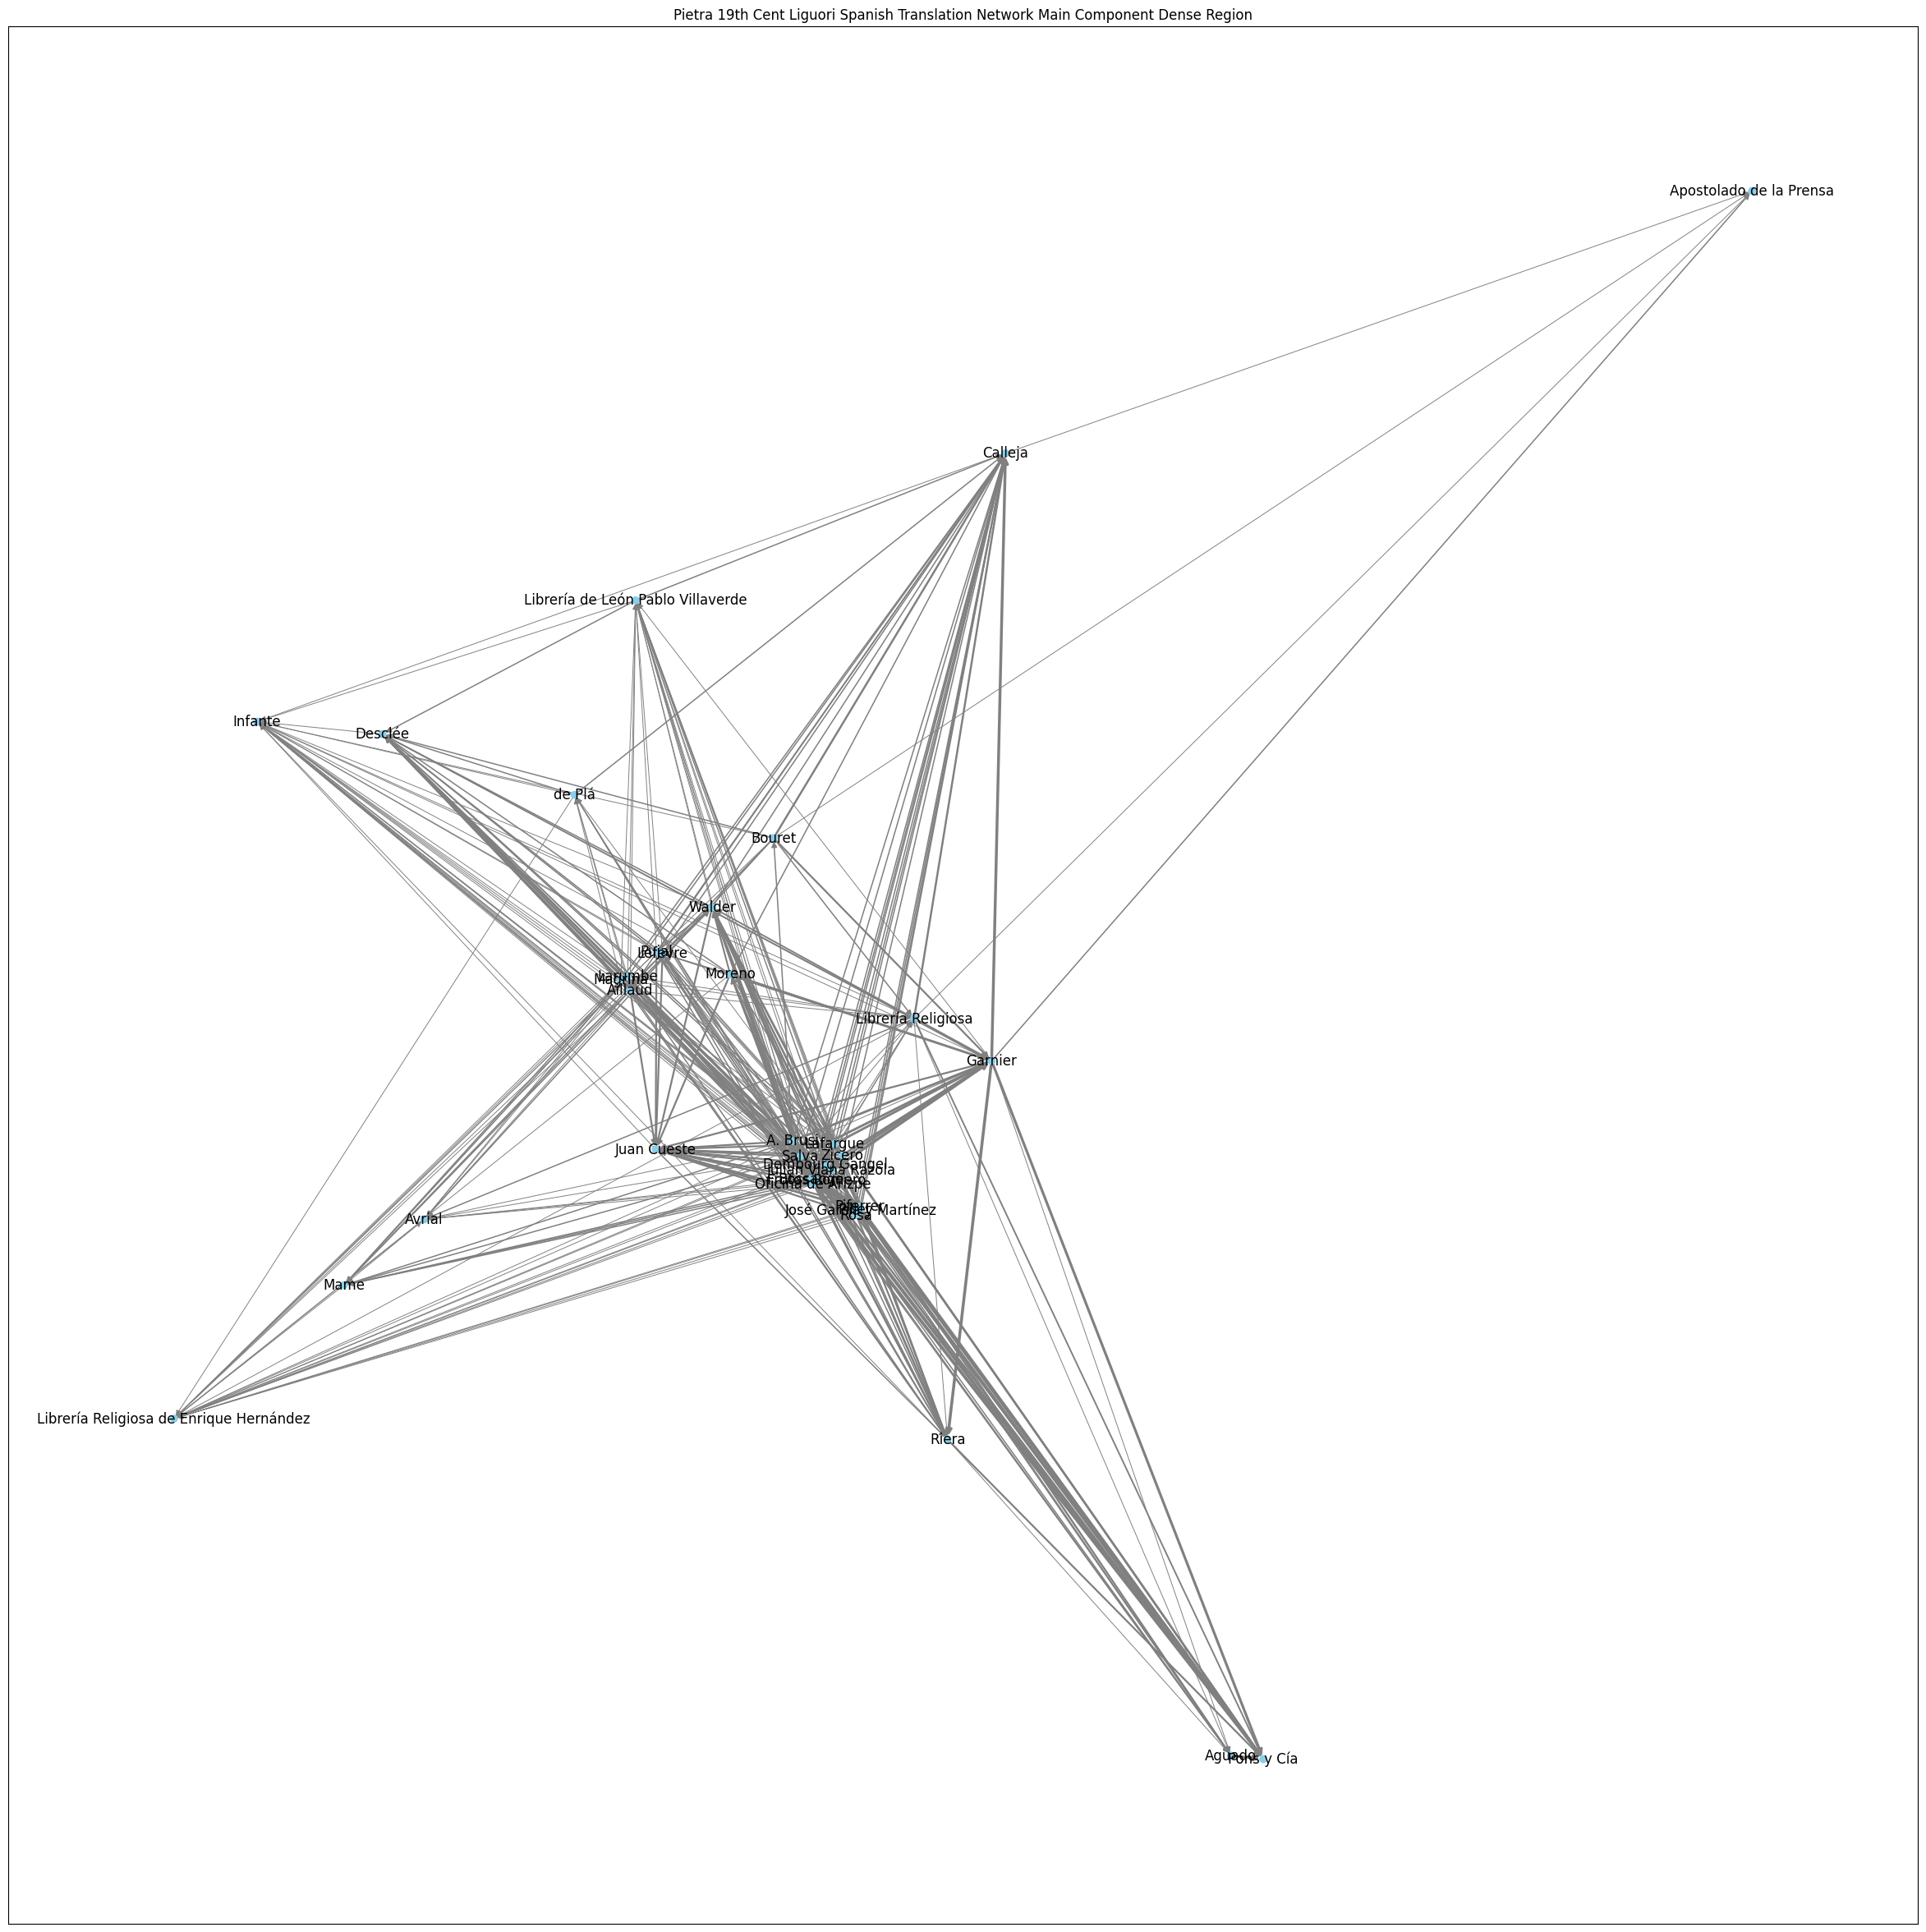

In [70]:

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G_main_component_dense_region)

node_sizes2 = [G_main_component_dense_region[node].get('magnitude', 1) for node in G_main_component_dense_region.nodes()]

node_sizes2 = [size * 36 for size in node_sizes2]

edge_widths2 = [np.log(data['weight'] + 1) for _, _, data in G_main_component_dense_region.edges(data=True)]

nx.draw_networkx(G_main_component_dense_region, pos, node_size=node_sizes2, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths2, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori Spanish Translation Network Main Component Dense Region")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_SP_Main_Component_Zoom.png')

plt.show()